In [33]:
import pandas as pd
from pandas.plotting import radviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib
from pandas import DataFrame

In [34]:
def read(file):
    return pd.read_csv(file)

#features.set_index(['Index'], inplace = True)
#features.drop(columns = ['Index'], inplace = True)

features = read('csv_data.csv')
#features.head(5)

In [35]:
def print_shape(data):
    print("The shape of our feature is " + str(data.shape))

print_shape(features)

# Calculate the threshold
np_array = np.array(features)
#print(np_array)
np_array = np_array[:,3]
threshold = np.average(np_array)
#print(threshold)
#print(np_array)

The shape of our feature is (177, 4)


In [36]:
#pd.options.display.max_rows = 181
pd.options.display.max_columns = 30
#features.sort_values(by = "L [mm]", ascending = True, inplace = True)
#display(features)

In [37]:
#one hot encoding
pd.options.display.max_columns = 181
pd.options.display.max_rows = 181
#features = pd.get_dummies(features, columns = ['n [count]', 'Material'])
#features = pd.get_dummies(features, columns = ['n [count]'])
#features = pd.get_dummies(features, columns = ['Material'])
#features.head(5)
#display(features)
#print_shape(features)

In [38]:
#target pmax
pmax = np.array(features['Pmax [N]'])
#Remove labels from the features
features = features.drop('Pmax [N]', axis = 1)

#features = StandardScaler().fit_transform(features)

#pca = PCA(n_components = 11)
#principalComponents = pca.fit_transform(features)
#features = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
#display(features)
#print(pca.explained_variance_ratio_.cumsum())

#Covert to numpy arrays
features = np.array(features)
#print(features)

print_shape(features)

The shape of our feature is (177, 3)


In [39]:
#split the data into training set and testing set 
train_features, test_features, train_labels, test_labels = train_test_split(features, pmax, test_size = 0.25, random_state = 42)

In [40]:
sc = StandardScaler()
sc.fit(train_features)
x_train_std = sc.transform(train_features)
x_test_std = sc.transform(test_features)


x_train_std = np.insert(x_train_std, 0, 1, axis = 1)
x_test_std = np.insert(x_test_std, 0, 1, axis = 1)
#print(train_features)
#print(test_features)
for i in range(test_labels.shape[0]):
    if test_labels[i] > threshold:
        test_labels[i] = 1
    else:
        test_labels[i] = -1
#print(test_labels)

for i in range(train_labels.shape[0]):
    if train_labels[i] > threshold:
        train_labels[i] = 1
    else:
        train_labels[i] = -1
#print(train_labels)



In [41]:
# Create a perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
ppn = Perceptron(max_iter = 100, eta0=1, random_state=0)

pmax_pred = np.empty(test_labels.shape)

# Train the perceptron
ppn = ppn.fit(x_train_std, np.asarray(train_labels, dtype="|S6"))
y_pred = ppn.predict(x_test_std)
print(y_pred.shape[0])
for i in range(y_pred.shape[0]):
    pmax_pred[i] = y_pred[i]
#Calculate the absolute errors
errors = abs(np.asarray(y_pred, dtype=float) - np.asarray(test_labels, dtype=float))

# pmax prediction array
print(pmax_pred)

#print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'newton.')



45
[-1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1. -1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1.  1. -1.
 -1. -1. -1.  1.  1. -1.  1. -1. -1.]
Mean Absolute Error: 0.31 newton.


In [42]:
# Calculate mean absolute percentage error
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 77.78 %.


In [43]:
#new = DataFrame(pmax_pred, test_labels)
#new.to_csv("line_to_scatter_converter.csv")

In [44]:
mid = pd.read_csv("line_to_scatter_converter.csv")
mid.sort_values(by = "truth", inplace = True)
mid.to_csv("lts_sort.csv", index = False)

In [45]:
final = pd.read_csv("lts_sort.csv")
index = final.index
pmax_pred = final["predict"]
label = final["truth"]

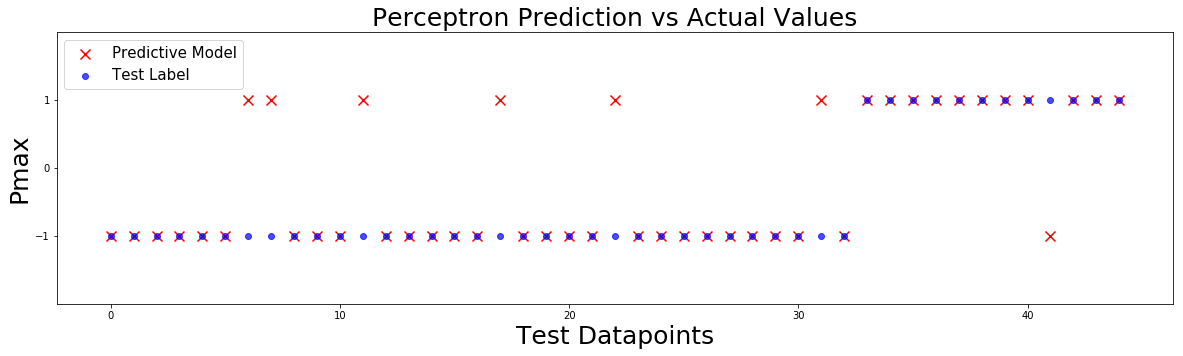

In [61]:
fig = plt.figure(figsize=(20,5))
plt.xlabel("Test Datapoints", fontsize = 25)
plt.ylabel("Pmax", fontsize = 25)
plt.title("Perceptron Prediction vs Actual Values", fontsize = 25)
plt.yticks(np.arange(min(pmax_pred), max(pmax_pred)+1, 1.0))
plt.ylim(-2, 2)

plt.scatter(index, pmax_pred, color = "r", label = "Predictive Model", marker = "x", s = 100)
plt.scatter(index, label, color = "b", alpha = 0.7, label = "Test Label")

plt.legend(loc = 2, prop = {"size" : 15})



plt.savefig("Perceptron_plot.png")